In [50]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [82]:
CLIENT_ID = 'KGFCI2DJTKFNTKRKS352MUG2W0Z2QTPQXD0QW3AK1GAV4ZZU' # your Foursquare ID
CLIENT_SECRET = '00CFRVYOVP3WG0A2R1LWIU1UF0KULZULFLQLY53X1YENKBSB' # your Foursquare Secret
VERSION = '20201004'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KGFCI2DJTKFNTKRKS352MUG2W0Z2QTPQXD0QW3AK1GAV4ZZU
CLIENT_SECRET:00CFRVYOVP3WG0A2R1LWIU1UF0KULZULFLQLY53X1YENKBSB


In [83]:
address = '102 North End Ave, New York, NY' # where I want to begin my business

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7149555 -74.0153365


In [84]:
search_query = 'Chinese' # I would like to start a chinese one
radius = 5000
print(search_query + ' .... OK!')

Chinese .... OK!


In [85]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=KGFCI2DJTKFNTKRKS352MUG2W0Z2QTPQXD0QW3AK1GAV4ZZU&client_secret=00CFRVYOVP3WG0A2R1LWIU1UF0KULZULFLQLY53X1YENKBSB&ll=40.7149555,-74.0153365&v=20201004&query=Chinese&radius=5000&limit=30'

In [86]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f83e1b21506b90ebd1a40d5'},
 'response': {'venues': [{'id': '4bf978b5bc869521a6b97a6b',
    'name': 'OCM - Oversea Chinese Mission',
    'location': {'address': '154 Hester St',
     'crossStreet': 'at Elizabeth St.',
     'lat': 40.717563959884664,
     'lng': -73.99644379172986,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.717563959884664,
       'lng': -73.99644379172986},
      {'label': 'entrance', 'lat': 40.71759, 'lng': -73.996545}],
     'distance': 1620,
     'postalCode': '10013',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['154 Hester St (at Elizabeth St.)',
      'New York, NY 10013',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d132941735',
      'name': 'Church',
      'pluralName': 'Churches',
      'shortName': 'Church',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_',
       

In [87]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-87-5acf500bf9ad>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4bf978b5bc869521a6b97a6b,OCM - Oversea Chinese Mission,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",v-1602478514,False,154 Hester St,at Elizabeth St.,40.717564,-73.996444,"[{'label': 'display', 'lat': 40.71756395988466...",...,NY,United States,"[154 Hester St (at Elizabeth St.), New York, N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4bac00a1f964a52025dd3ae3,Museum of Chinese in America (MOCA),"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",v-1602478514,False,215 Centre St,btwn Howard & Grand St,40.719361,-73.999086,"[{'label': 'display', 'lat': 40.71936148321417...",...,NY,United States,"[215 Centre St (btwn Howard & Grand St), New Y...",58596016,NaN,NaN,NaN,NaN,NaN,NaN
2,4ebaede0a17c5dccac5210f7,Wall Street Chinese,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1602478514,False,32 Broadway,NaN,40.705794,-74.012721,"[{'label': 'display', 'lat': 40.705794, 'lng':...",...,NY,United States,"[32 Broadway, New York, NY 10004, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4bf2dc586ba2b713560c8977,Chinese American IPA,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1602478514,False,41 Elizabeth St,NaN,40.719729,-73.999962,"[{'label': 'display', 'lat': 40.71972928254605...",...,NY,United States,"[41 Elizabeth St, New York, NY 10013, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f3259a219836c91c7cf1778,Lei Ke Massage and Chinese Herbal Medicine,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1602478514,False,265 Canal St,NaN,40.718838,-74.000785,"[{'label': 'display', 'lat': 40.718838, 'lng':...",...,NY,United States,"[265 Canal St, New York, NY 10013, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,OCM - Oversea Chinese Mission,Church,154 Hester St,at Elizabeth St.,40.717564,-73.996444,"[{'label': 'display', 'lat': 40.71756395988466...",1620,10013,US,New York,NY,United States,"[154 Hester St (at Elizabeth St.), New York, N...",4bf978b5bc869521a6b97a6b
1,Museum of Chinese in America (MOCA),History Museum,215 Centre St,btwn Howard & Grand St,40.719361,-73.999086,"[{'label': 'display', 'lat': 40.71936148321417...",1456,10013,US,New York,NY,United States,"[215 Centre St (btwn Howard & Grand St), New Y...",4bac00a1f964a52025dd3ae3
2,Wall Street Chinese,General Entertainment,32 Broadway,NaN,40.705794,-74.012721,"[{'label': 'display', 'lat': 40.705794, 'lng':...",1043,10004,US,New York,NY,United States,"[32 Broadway, New York, NY 10004, United States]",4ebaede0a17c5dccac5210f7
3,Chinese American IPA,Office,41 Elizabeth St,NaN,40.719729,-73.999962,"[{'label': 'display', 'lat': 40.71972928254605...",1401,10013,US,New York,NY,United States,"[41 Elizabeth St, New York, NY 10013, United S...",4bf2dc586ba2b713560c8977
4,Lei Ke Massage and Chinese Herbal Medicine,Food,265 Canal St,NaN,40.718838,-74.000785,"[{'label': 'display', 'lat': 40.718838, 'lng':...",1301,10013,US,New York,NY,United States,"[265 Canal St, New York, NY 10013, United States]",4f3259a219836c91c7cf1778


In [89]:
dataframe_filtered.name

0                  OCM - Oversea Chinese Mission
1            Museum of Chinese in America (MOCA)
2                            Wall Street Chinese
3                           Chinese American IPA
4     Lei Ke Massage and Chinese Herbal Medicine
5                         Chinese qi gong tui-na
6        Chinese Free Mason Athletic Association
7                      Chinese Mirch (WTC Truck)
8                             Number One Chinese
9         Great Fortune Chinese Restaurant 聚旺茶餐廳
10              123 Mott St Chinese Herbal Store
11             Chinese American Planning Council
12      Chinese Christian Herald Crusades - CCHC
13             Chinese-American Planning Council
14             88 Reach House chinese restaurant
15                              Chinese Fast Wok
16                      Jiangnan Chinese Cuisine
17                         Chinese Opera Society
18                      Taste Chinese Restaurant
19                        Chinese Qigong Massage
20                  

In [90]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='My Location',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [101]:
s={}
for id in dataframe_filtered['id']:

    venue_id = id 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    result['response']['venue']

    try:
        print(result['response']['venue']['rating'])
        s[id]= result['response']['venue']['rating']
    except:
        print('This venue has not been rated yet.')

This venue has not been rated yet.
8.8
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
5.9
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
5.3
6.2
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
7.3
This venue has not been rated yet.
5.9
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.


In [142]:
df1 = ()
df1 = np.array(s.values())


In [143]:
max(s.values()) #highest rate

8.8

In [145]:
min(s.values()) #lowest rate

5.3

In [146]:
sum(s.values())/len(s.values()) #average score

6.566666666666666

In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

TypeError: '<' not supported between instances of 'dict_values' and 'float'

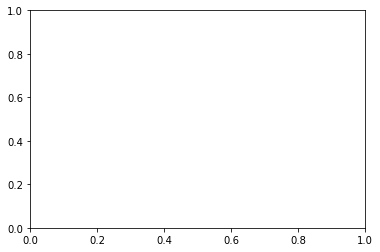

In [150]:
plt.hist(df1, bins = 3)
plt.show()